In [2]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [3]:
import numpy as np
import cv2
import os
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
os.listdir('/content/gdrive/MyDrive/Colab Notebooks/data')

['haarcascade_frontalface_alt.xml',
 'trial.png',
 'models',
 'cat',
 'bollywood_celeb_faces_0']

In [5]:
face_cascade = cv2.CascadeClassifier('/content/gdrive/MyDrive/Colab Notebooks/data/haarcascade_frontalface_alt.xml')


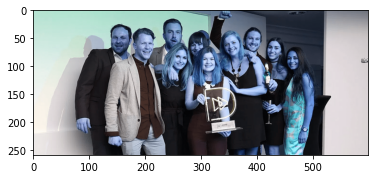

In [6]:
img_bgr = cv2.imread('/content/gdrive/MyDrive/Colab Notebooks/data/trial.png')
plt.imshow(img_bgr)

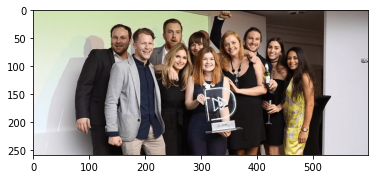

In [7]:
img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)
plt.imshow(img_rgb)

In [8]:
face_rects = face_cascade.detectMultiScale(img_rgb) 

In [9]:
face_rects

array([[185,  45,  37,  37],
       [233,  24,  40,  40],
       [379,  39,  33,  33],
       [338,  48,  32,  32],
       [133,  33,  42,  42],
       [414,  55,  31,  31],
       [299,  77,  29,  29],
       [450,  75,  29,  29],
       [249,  73,  31,  31]], dtype=int32)

In [10]:
# cv2.rectangle(image, start_point, end_point, color, thickness) 

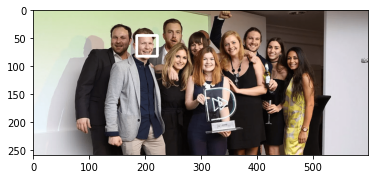

In [11]:
img_rgb1=img_rgb.copy()
cv2.rectangle(img_rgb1, (185,45), (185+37,45+37), (255,255,255), 3) 
plt.imshow(img_rgb1)

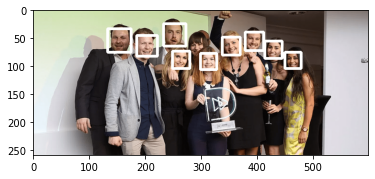

In [12]:
img_rgb1=img_rgb.copy()
for lst in face_rects:
  cv2.rectangle(img_rgb1, (lst[0],lst[1]), (lst[0]+lst[2],lst[1]+lst[3]), (255,255,255), 3) 
plt.imshow(img_rgb1)


In [13]:
## Here we have successfully recognise all the faces using haarcascade_frontalface_alt

In [14]:

img_rgb1=img_rgb.copy()
face=[]
for lst in face_rects:
  a=img_rgb1[lst[0]:lst[0]+lst[2] , lst[1]:lst[1]+lst[3] ]
face.append(a)


In [15]:
face_rects

array([[185,  45,  37,  37],
       [233,  24,  40,  40],
       [379,  39,  33,  33],
       [338,  48,  32,  32],
       [133,  33,  42,  42],
       [414,  55,  31,  31],
       [299,  77,  29,  29],
       [450,  75,  29,  29],
       [249,  73,  31,  31]], dtype=int32)

In [16]:
#extracting images

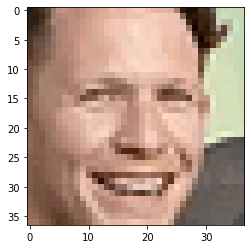

In [17]:
plt.imshow(img_rgb1[45:45+37,185:185+37  ])

In [18]:
img_rgb1=img_rgb.copy()
faces=[]
for lst in face_rects:
  a=img_rgb1[lst[1]:lst[1]+lst[3] , lst[0]:lst[0]+lst[2]  ]
  faces.append(a)



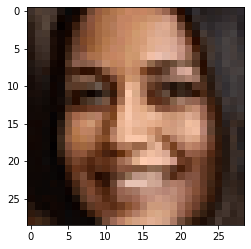

In [19]:
plt.imshow(faces[7])

In [20]:
from zipfile import ZipFile
from urllib.request import urlopen
import bz2


In [21]:
##It‘s a landmark’s facial detector with pre-trained models, 
##the dlib is used to estimate the location of 68 coordinates (x, y) 
##that map the facial points on a person’s face

In [22]:
from urllib.request import urlopen

def download_landmarks(dst_file):
    url = 'http://dlib.net/files/shape_predictor_68_face_landmarks.dat.bz2'
    decompressor = bz2.BZ2Decompressor()
    
    with urlopen(url) as src, open(dst_file, 'wb') as dst:
        data = src.read(1024)
        while len(data) > 0:
            dst.write(decompressor.decompress(data))
            data = src.read(1024)

dst_dir = '/content/gdrive/MyDrive/Colab Notebooks/data/models'
dst_file = os.path.join(dst_dir, 'landmarks.dat')

if not os.path.exists(dst_file):
    os.makedirs(dst_dir)
    download_landmarks(dst_file)

In [23]:
#!pip install googleimagedownloader

In [24]:
#from googleimagedownloader.googleimagedownloader import GoogleImageDownloader


In [25]:
#image = GoogleImageDownloader(Query='cat', numberImage=5)
#image.saveCsv()
#image.saveJson()
#image.downloadImages()
#Download all Images and stores inside the folder called Images


In [26]:
#!pip install bing-image-downloader
#from bing_image_downloader import downloader
#downloader.download('monkey', limit=10,  output_dir='/content/gdrive/MyDrive/Colab Notebooks/data/cat/', adult_filter_off=True, force_replace=False, timeout=60)


In [28]:
## This code is taken from https://openface-api.readthedocs.io/en/latest/_modules/openface/align_dlib.html
# this help us to identify face 
import cv2
import dlib
import numpy as np


TEMPLATE = np.float32([
    (0.0792396913815, 0.339223741112), (0.0829219487236, 0.456955367943),
    (0.0967927109165, 0.575648016728), (0.122141515615, 0.691921601066),
    (0.168687863544, 0.800341263616), (0.239789390707, 0.895732504778),
    (0.325662452515, 0.977068762493), (0.422318282013, 1.04329000149),
    (0.531777802068, 1.06080371126), (0.641296298053, 1.03981924107),
    (0.738105872266, 0.972268833998), (0.824444363295, 0.889624082279),
    (0.894792677532, 0.792494155836), (0.939395486253, 0.681546643421),
    (0.96111933829, 0.562238253072), (0.970579841181, 0.441758925744),
    (0.971193274221, 0.322118743967), (0.163846223133, 0.249151738053),
    (0.21780354657, 0.204255863861), (0.291299351124, 0.192367318323),
    (0.367460241458, 0.203582210627), (0.4392945113, 0.233135599851),
    (0.586445962425, 0.228141644834), (0.660152671635, 0.195923841854),
    (0.737466449096, 0.182360984545), (0.813236546239, 0.192828009114),
    (0.8707571886, 0.235293377042), (0.51534533827, 0.31863546193),
    (0.516221448289, 0.396200446263), (0.517118861835, 0.473797687758),
    (0.51816430343, 0.553157797772), (0.433701156035, 0.604054457668),
    (0.475501237769, 0.62076344024), (0.520712933176, 0.634268222208),
    (0.565874114041, 0.618796581487), (0.607054002672, 0.60157671656),
    (0.252418718401, 0.331052263829), (0.298663015648, 0.302646354002),
    (0.355749724218, 0.303020650651), (0.403718978315, 0.33867711083),
    (0.352507175597, 0.349987615384), (0.296791759886, 0.350478978225),
    (0.631326076346, 0.334136672344), (0.679073381078, 0.29645404267),
    (0.73597236153, 0.294721285802), (0.782865376271, 0.321305281656),
    (0.740312274764, 0.341849376713), (0.68499850091, 0.343734332172),
    (0.353167761422, 0.746189164237), (0.414587777921, 0.719053835073),
    (0.477677654595, 0.706835892494), (0.522732900812, 0.717092275768),
    (0.569832064287, 0.705414478982), (0.635195811927, 0.71565572516),
    (0.69951672331, 0.739419187253), (0.639447159575, 0.805236879972),
    (0.576410514055, 0.835436670169), (0.525398405766, 0.841706377792),
    (0.47641545769, 0.837505914975), (0.41379548902, 0.810045601727),
    (0.380084785646, 0.749979603086), (0.477955996282, 0.74513234612),
    (0.523389793327, 0.748924302636), (0.571057789237, 0.74332894691),
    (0.672409137852, 0.744177032192), (0.572539621444, 0.776609286626),
    (0.5240106503, 0.783370783245), (0.477561227414, 0.778476346951)])

TPL_MIN, TPL_MAX = np.min(TEMPLATE, axis=0), np.max(TEMPLATE, axis=0)
MINMAX_TEMPLATE = (TEMPLATE - TPL_MIN) / (TPL_MAX - TPL_MIN)


class AlignDlib:
    """
    Use `dlib's landmark estimation <http://blog.dlib.net/2014/08/real-time-face-pose-estimation.html>`_ to align faces.
    The alignment preprocess faces for input into a neural network.
    Faces are resized to the same size (such as 96x96) and transformed
    to make landmarks (such as the eyes and nose) appear at the same
    location on every image.
    Normalized landmarks:
    .. image:: ../images/dlib-landmark-mean.png
    """

    #: Landmark indices.
    INNER_EYES_AND_BOTTOM_LIP = [39, 42, 57]
    OUTER_EYES_AND_NOSE = [36, 45, 33]

    def __init__(self, facePredictor):
        """
        Instantiate an 'AlignDlib' object.
        :param facePredictor: The path to dlib's
        :type facePredictor: str
        """
        assert facePredictor is not None

        self.detector = dlib.get_frontal_face_detector()
        self.predictor = dlib.shape_predictor(facePredictor)

    def getAllFaceBoundingBoxes(self, rgbImg):
        """
        Find all face bounding boxes in an image.
        :param rgbImg: RGB image to process. Shape: (height, width, 3)
        :type rgbImg: numpy.ndarray
        :return: All face bounding boxes in an image.
        :rtype: dlib.rectangles
        """
        assert rgbImg is not None

        try:
            return self.detector(rgbImg, 1)
        except Exception as e:
            print("Warning: {}".format(e))
            # In rare cases, exceptions are thrown.
            return []

    def getLargestFaceBoundingBox(self, rgbImg, skipMulti=False):
        """
        Find the largest face bounding box in an image.
        :param rgbImg: RGB image to process. Shape: (height, width, 3)
        :type rgbImg: numpy.ndarray
        :param skipMulti: Skip image if more than one face detected.
        :type skipMulti: bool
        :return: The largest face bounding box in an image, or None.
        :rtype: dlib.rectangle
        """
        assert rgbImg is not None

        faces = self.getAllFaceBoundingBoxes(rgbImg)
        if (not skipMulti and len(faces) > 0) or len(faces) == 1:
            return max(faces, key=lambda rect: rect.width() * rect.height())
        else:
            return None

    def findLandmarks(self, rgbImg, bb):
        """
        Find the landmarks of a face.
        :param rgbImg: RGB image to process. Shape: (height, width, 3)
        :type rgbImg: numpy.ndarray
        :param bb: Bounding box around the face to find landmarks for.
        :type bb: dlib.rectangle
        :return: Detected landmark locations.
        :rtype: list of (x,y) tuples
        """
        assert rgbImg is not None
        assert bb is not None

        points = self.predictor(rgbImg, bb)
        return list(map(lambda p: (p.x, p.y), points.parts()))

    def align(self, imgDim, rgbImg, bb=None,
              landmarks=None, landmarkIndices=INNER_EYES_AND_BOTTOM_LIP,
              skipMulti=False):
        r"""align(imgDim, rgbImg, bb=None, landmarks=None, landmarkIndices=INNER_EYES_AND_BOTTOM_LIP)
        Transform and align a face in an image.
        :param imgDim: The edge length in pixels of the square the image is resized to.
        :type imgDim: int
        :param rgbImg: RGB image to process. Shape: (height, width, 3)
        :type rgbImg: numpy.ndarray
        :param bb: Bounding box around the face to align. \
                   Defaults to the largest face.
        :type bb: dlib.rectangle
        :param landmarks: Detected landmark locations. \
                          Landmarks found on `bb` if not provided.
        :type landmarks: list of (x,y) tuples
        :param landmarkIndices: The indices to transform to.
        :type landmarkIndices: list of ints
        :param skipMulti: Skip image if more than one face detected.
        :type skipMulti: bool
        :return: The aligned RGB image. Shape: (imgDim, imgDim, 3)
        :rtype: numpy.ndarray
        """
        assert imgDim is not None
        assert rgbImg is not None
        assert landmarkIndices is not None

        if bb is None:
            bb = self.getLargestFaceBoundingBox(rgbImg, skipMulti)
            if bb is None:
                return

        if landmarks is None:
            landmarks = self.findLandmarks(rgbImg, bb)

        npLandmarks = np.float32(landmarks)
        npLandmarkIndices = np.array(landmarkIndices)

        H = cv2.getAffineTransform(npLandmarks[npLandmarkIndices],
                                   imgDim * MINMAX_TEMPLATE[npLandmarkIndices])
        thumbnail = cv2.warpAffine(rgbImg, H, (imgDim, imgDim))

        return thumbnail

In [29]:
os.listdir('/content/gdrive/MyDrive/Colab Notebooks/data/models')

['landmarks1.dat', 'landmarks.dat', 'open_face.h5']

In [30]:
alignment = AlignDlib('/content/gdrive/MyDrive/Colab Notebooks/data/models/landmarks.dat')


In [31]:
#utils.py code is taken from https://raw.githubusercontent.com/iwantooxxoox/Keras-OpenFace/master/utils.py

In [32]:
from google.colab import files
src = list(files.upload().values())[0]

Saving utils1.py to utils1.py


In [33]:
open('utils1.py','wb').write(src)
import utils1

In [34]:
#src = list(files.upload().values())[0]

In [35]:
import utils1

In [37]:
# -----------------------------------------------------------------------------------------
# Code taken from https://github.com/iwantooxxoox/Keras-OpenFace 
# -----------------------------------------------------------------------------------------

from keras.layers import Conv2D, ZeroPadding2D, Activation, Input, concatenate
from keras.layers.core import Lambda, Flatten, Dense
from keras.layers.normalization import BatchNormalization
from keras.layers.pooling import MaxPooling2D, AveragePooling2D
from keras.models import Model
from keras import backend as K

#import utils
from utils1 import LRN2D

def create_model():
    myInput = Input(shape=(96, 96, 3))

    x = ZeroPadding2D(padding=(3, 3), input_shape=(96, 96, 3))(myInput)
    x = Conv2D(64, (7, 7), strides=(2, 2), name='conv1')(x)
    x = BatchNormalization(axis=3, epsilon=0.00001, name='bn1')(x)
    x = Activation('relu')(x)
    x = ZeroPadding2D(padding=(1, 1))(x)
    x = MaxPooling2D(pool_size=3, strides=2)(x)
    x = Lambda(LRN2D, name='lrn_1')(x)
    x = Conv2D(64, (1, 1), name='conv2')(x)
    x = BatchNormalization(axis=3, epsilon=0.00001, name='bn2')(x)
    x = Activation('relu')(x)
    x = ZeroPadding2D(padding=(1, 1))(x)
    x = Conv2D(192, (3, 3), name='conv3')(x)
    x = BatchNormalization(axis=3, epsilon=0.00001, name='bn3')(x)
    x = Activation('relu')(x)
    x = Lambda(LRN2D, name='lrn_2')(x)
    x = ZeroPadding2D(padding=(1, 1))(x)
    x = MaxPooling2D(pool_size=3, strides=2)(x)

    # Inception3a
    inception_3a_3x3 = Conv2D(96, (1, 1), name='inception_3a_3x3_conv1')(x)
    inception_3a_3x3 = BatchNormalization(axis=3, epsilon=0.00001, name='inception_3a_3x3_bn1')(inception_3a_3x3)
    inception_3a_3x3 = Activation('relu')(inception_3a_3x3)
    inception_3a_3x3 = ZeroPadding2D(padding=(1, 1))(inception_3a_3x3)
    inception_3a_3x3 = Conv2D(128, (3, 3), name='inception_3a_3x3_conv2')(inception_3a_3x3)
    inception_3a_3x3 = BatchNormalization(axis=3, epsilon=0.00001, name='inception_3a_3x3_bn2')(inception_3a_3x3)
    inception_3a_3x3 = Activation('relu')(inception_3a_3x3)

    inception_3a_5x5 = Conv2D(16, (1, 1), name='inception_3a_5x5_conv1')(x)
    inception_3a_5x5 = BatchNormalization(axis=3, epsilon=0.00001, name='inception_3a_5x5_bn1')(inception_3a_5x5)
    inception_3a_5x5 = Activation('relu')(inception_3a_5x5)
    inception_3a_5x5 = ZeroPadding2D(padding=(2, 2))(inception_3a_5x5)
    inception_3a_5x5 = Conv2D(32, (5, 5), name='inception_3a_5x5_conv2')(inception_3a_5x5)
    inception_3a_5x5 = BatchNormalization(axis=3, epsilon=0.00001, name='inception_3a_5x5_bn2')(inception_3a_5x5)
    inception_3a_5x5 = Activation('relu')(inception_3a_5x5)

    inception_3a_pool = MaxPooling2D(pool_size=3, strides=2)(x)
    inception_3a_pool = Conv2D(32, (1, 1), name='inception_3a_pool_conv')(inception_3a_pool)
    inception_3a_pool = BatchNormalization(axis=3, epsilon=0.00001, name='inception_3a_pool_bn')(inception_3a_pool)
    inception_3a_pool = Activation('relu')(inception_3a_pool)
    inception_3a_pool = ZeroPadding2D(padding=((3, 4), (3, 4)))(inception_3a_pool)

    inception_3a_1x1 = Conv2D(64, (1, 1), name='inception_3a_1x1_conv')(x)
    inception_3a_1x1 = BatchNormalization(axis=3, epsilon=0.00001, name='inception_3a_1x1_bn')(inception_3a_1x1)
    inception_3a_1x1 = Activation('relu')(inception_3a_1x1)

    inception_3a = concatenate([inception_3a_3x3, inception_3a_5x5, inception_3a_pool, inception_3a_1x1], axis=3)

    # Inception3b
    inception_3b_3x3 = Conv2D(96, (1, 1), name='inception_3b_3x3_conv1')(inception_3a)
    inception_3b_3x3 = BatchNormalization(axis=3, epsilon=0.00001, name='inception_3b_3x3_bn1')(inception_3b_3x3)
    inception_3b_3x3 = Activation('relu')(inception_3b_3x3)
    inception_3b_3x3 = ZeroPadding2D(padding=(1, 1))(inception_3b_3x3)
    inception_3b_3x3 = Conv2D(128, (3, 3), name='inception_3b_3x3_conv2')(inception_3b_3x3)
    inception_3b_3x3 = BatchNormalization(axis=3, epsilon=0.00001, name='inception_3b_3x3_bn2')(inception_3b_3x3)
    inception_3b_3x3 = Activation('relu')(inception_3b_3x3)

    inception_3b_5x5 = Conv2D(32, (1, 1), name='inception_3b_5x5_conv1')(inception_3a)
    inception_3b_5x5 = BatchNormalization(axis=3, epsilon=0.00001, name='inception_3b_5x5_bn1')(inception_3b_5x5)
    inception_3b_5x5 = Activation('relu')(inception_3b_5x5)
    inception_3b_5x5 = ZeroPadding2D(padding=(2, 2))(inception_3b_5x5)
    inception_3b_5x5 = Conv2D(64, (5, 5), name='inception_3b_5x5_conv2')(inception_3b_5x5)
    inception_3b_5x5 = BatchNormalization(axis=3, epsilon=0.00001, name='inception_3b_5x5_bn2')(inception_3b_5x5)
    inception_3b_5x5 = Activation('relu')(inception_3b_5x5)

    inception_3b_pool = AveragePooling2D(pool_size=(3, 3), strides=(3, 3))(inception_3a)
    inception_3b_pool = Conv2D(64, (1, 1), name='inception_3b_pool_conv')(inception_3b_pool)
    inception_3b_pool = BatchNormalization(axis=3, epsilon=0.00001, name='inception_3b_pool_bn')(inception_3b_pool)
    inception_3b_pool = Activation('relu')(inception_3b_pool)
    inception_3b_pool = ZeroPadding2D(padding=(4, 4))(inception_3b_pool)

    inception_3b_1x1 = Conv2D(64, (1, 1), name='inception_3b_1x1_conv')(inception_3a)
    inception_3b_1x1 = BatchNormalization(axis=3, epsilon=0.00001, name='inception_3b_1x1_bn')(inception_3b_1x1)
    inception_3b_1x1 = Activation('relu')(inception_3b_1x1)

    inception_3b = concatenate([inception_3b_3x3, inception_3b_5x5, inception_3b_pool, inception_3b_1x1], axis=3)

    # Inception3c
    inception_3c_3x3 = utils1.conv2d_bn(inception_3b,
                                       layer='inception_3c_3x3',
                                       cv1_out=128,
                                       cv1_filter=(1, 1),
                                       cv2_out=256,
                                       cv2_filter=(3, 3),
                                       cv2_strides=(2, 2),
                                       padding=(1, 1))

    inception_3c_5x5 = utils1.conv2d_bn(inception_3b,
                                       layer='inception_3c_5x5',
                                       cv1_out=32,
                                       cv1_filter=(1, 1),
                                       cv2_out=64,
                                       cv2_filter=(5, 5),
                                       cv2_strides=(2, 2),
                                       padding=(2, 2))

    inception_3c_pool = MaxPooling2D(pool_size=3, strides=2)(inception_3b)
    inception_3c_pool = ZeroPadding2D(padding=((0, 1), (0, 1)))(inception_3c_pool)

    inception_3c = concatenate([inception_3c_3x3, inception_3c_5x5, inception_3c_pool], axis=3)

    #inception 4a
    inception_4a_3x3 = utils1.conv2d_bn(inception_3c,
                                       layer='inception_4a_3x3',
                                       cv1_out=96,
                                       cv1_filter=(1, 1),
                                       cv2_out=192,
                                       cv2_filter=(3, 3),
                                       cv2_strides=(1, 1),
                                       padding=(1, 1))
    inception_4a_5x5 = utils1.conv2d_bn(inception_3c,
                                       layer='inception_4a_5x5',
                                       cv1_out=32,
                                       cv1_filter=(1, 1),
                                       cv2_out=64,
                                       cv2_filter=(5, 5),
                                       cv2_strides=(1, 1),
                                       padding=(2, 2))

    inception_4a_pool = AveragePooling2D(pool_size=(3, 3), strides=(3, 3))(inception_3c)
    inception_4a_pool = utils1.conv2d_bn(inception_4a_pool,
                                        layer='inception_4a_pool',
                                        cv1_out=128,
                                        cv1_filter=(1, 1),
                                        padding=(2, 2))
    inception_4a_1x1 = utils1.conv2d_bn(inception_3c,
                                       layer='inception_4a_1x1',
                                       cv1_out=256,
                                       cv1_filter=(1, 1))
    inception_4a = concatenate([inception_4a_3x3, inception_4a_5x5, inception_4a_pool, inception_4a_1x1], axis=3)

    #inception4e
    inception_4e_3x3 = utils1.conv2d_bn(inception_4a,
                                       layer='inception_4e_3x3',
                                       cv1_out=160,
                                       cv1_filter=(1, 1),
                                       cv2_out=256,
                                       cv2_filter=(3, 3),
                                       cv2_strides=(2, 2),
                                       padding=(1, 1))
    inception_4e_5x5 = utils1.conv2d_bn(inception_4a,
                                       layer='inception_4e_5x5',
                                       cv1_out=64,
                                       cv1_filter=(1, 1),
                                       cv2_out=128,
                                       cv2_filter=(5, 5),
                                       cv2_strides=(2, 2),
                                       padding=(2, 2))
    inception_4e_pool = MaxPooling2D(pool_size=3, strides=2)(inception_4a)
    inception_4e_pool = ZeroPadding2D(padding=((0, 1), (0, 1)))(inception_4e_pool)

    inception_4e = concatenate([inception_4e_3x3, inception_4e_5x5, inception_4e_pool], axis=3)

    #inception5a
    inception_5a_3x3 = utils1.conv2d_bn(inception_4e,
                                       layer='inception_5a_3x3',
                                       cv1_out=96,
                                       cv1_filter=(1, 1),
                                       cv2_out=384,
                                       cv2_filter=(3, 3),
                                       cv2_strides=(1, 1),
                                       padding=(1, 1))

    inception_5a_pool = AveragePooling2D(pool_size=(3, 3), strides=(3, 3))(inception_4e)
    inception_5a_pool = utils1.conv2d_bn(inception_5a_pool,
                                        layer='inception_5a_pool',
                                        cv1_out=96,
                                        cv1_filter=(1, 1),
                                        padding=(1, 1))
    inception_5a_1x1 = utils1.conv2d_bn(inception_4e,
                                       layer='inception_5a_1x1',
                                       cv1_out=256,
                                       cv1_filter=(1, 1))

    inception_5a = concatenate([inception_5a_3x3, inception_5a_pool, inception_5a_1x1], axis=3)

    #inception_5b
    inception_5b_3x3 = utils1.conv2d_bn(inception_5a,
                                       layer='inception_5b_3x3',
                                       cv1_out=96,
                                       cv1_filter=(1, 1),
                                       cv2_out=384,
                                       cv2_filter=(3, 3),
                                       cv2_strides=(1, 1),
                                       padding=(1, 1))
    inception_5b_pool = MaxPooling2D(pool_size=3, strides=2)(inception_5a)
    inception_5b_pool = utils1.conv2d_bn(inception_5b_pool,
                                        layer='inception_5b_pool',
                                        cv1_out=96,
                                        cv1_filter=(1, 1))
    inception_5b_pool = ZeroPadding2D(padding=(1, 1))(inception_5b_pool)

    inception_5b_1x1 = utils1.conv2d_bn(inception_5a,
                                       layer='inception_5b_1x1',
                                       cv1_out=256,
                                       cv1_filter=(1, 1))
    inception_5b = concatenate([inception_5b_3x3, inception_5b_pool, inception_5b_1x1], axis=3)

    av_pool = AveragePooling2D(pool_size=(3, 3), strides=(1, 1))(inception_5b)
    reshape_layer = Flatten()(av_pool)
    dense_layer = Dense(128, name='dense_layer')(reshape_layer)
    norm_layer = Lambda(lambda  x: K.l2_normalize(x, axis=1), name='norm_layer')(dense_layer)

    return Model(inputs=[myInput], outputs=norm_layer)

In [38]:
model = create_model()
model.load_weights('/content/gdrive/MyDrive/Colab Notebooks/data/models/open_face.h5')

In [39]:
class IdentityMetadata():
    def __init__(self, base, name, file):
        # dataset base directory
        self.base = base
        # identity name
        self.name = name
        # image file name
        self.file = file

    def __repr__(self):
        return self.image_path()

    def image_path(self):
        return os.path.join(self.base, self.name, self.file)

In [40]:
os.listdir('/content/gdrive/MyDrive/Colab Notebooks/data')

['haarcascade_frontalface_alt.xml',
 'trial.png',
 'models',
 'cat',
 'bollywood_celeb_faces_0']

In [41]:
def extensions(path):
    extension = []
    for i in os.listdir(path):
        for f in os.listdir(os.path.join(path, i)):
            ext = os.path.splitext(f)[1]
            extension.append(ext)
    return np.array(extension)

extension = extensions('/content/gdrive/MyDrive/Colab Notebooks/data/bollywood_celeb_faces_0')

In [42]:
import pandas as pd
(pd.Series(extension)).value_counts()

.jpg     1132
.jpeg      22
.png       14
            8
.gif        4
dtype: int64

In [43]:
def load_metadata(path):
  metadata = []
  for i in os.listdir(path):
    for f in os.listdir(os.path.join(path, i)):
      ext = os.path.splitext(f)[1]
      if ext == '.jpg' or ext == '.jpeg' or ext=='.png':
        metadata.append(IdentityMetadata(path, i, f))
  return np.array(metadata)

metadata = load_metadata('/content/gdrive/MyDrive/Colab Notebooks/data/bollywood_celeb_faces_0')

In [44]:
metadata[1]

/content/gdrive/MyDrive/Colab Notebooks/data/bollywood_celeb_faces_0/Ameesha_Patel/2.jpg

In [45]:
names = np.array([m.name for m in metadata])


In [46]:
pd.Series(names).value_counts()[:5]


Deepika_Padukone    196
Alia_Bhatt          166
Aishwarya_Rai       163
Disha_Patani        152
Huma_Qureshi        128
dtype: int64

In [47]:
bases = np.array([m.base for m in metadata])


In [48]:
bases[:1]

array(['/content/gdrive/MyDrive/Colab Notebooks/data/bollywood_celeb_faces_0'],
      dtype='<U68')

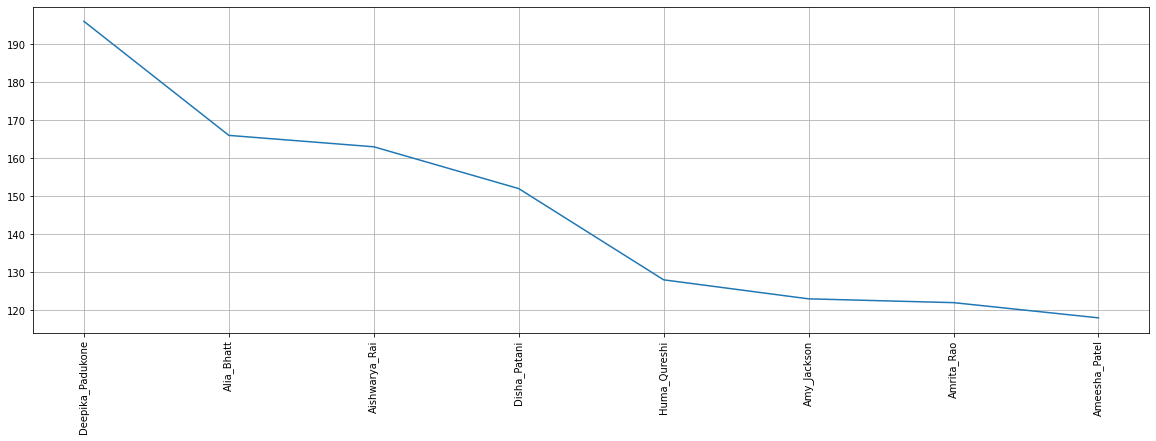

In [49]:
plt.figure(figsize=(20,6))
plt.plot(pd.Series(names).value_counts())
plt.xticks(rotation=90)
plt.grid(b=True)
plt.show()

In [50]:

metadata[1]

/content/gdrive/MyDrive/Colab Notebooks/data/bollywood_celeb_faces_0/Ameesha_Patel/2.jpg

In [51]:
img=cv2.imread(str(metadata[1]), 1)

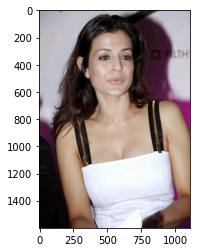

In [52]:
plt.imshow(img[...,::-1])

In [53]:
def load_image(path):
    img = cv2.imread(str(path), 1)
    return img[...,::-1]
def align_image(img):
    return alignment.align(96, img, alignment.getLargestFaceBoundingBox(img), 
                           landmarkIndices=AlignDlib.OUTER_EYES_AND_NOSE)

In [54]:
img=alignment.align(96, img[...,::-1], alignment.getLargestFaceBoundingBox(img), 
                           landmarkIndices=AlignDlib.OUTER_EYES_AND_NOSE)

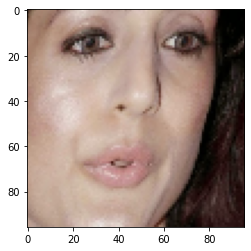

In [55]:
plt.imshow(img)

In [56]:
img = (img / 255.).astype(np.float32)

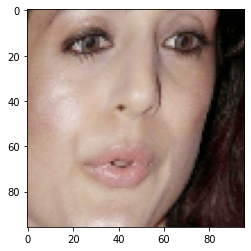

In [57]:
plt.imshow(img)

In [58]:
img.shape

(96, 96, 3)

In [59]:
model.predict(np.expand_dims(img, axis=0)).shape

(1, 128)

In [60]:
##tqdm is use to show progress
from tqdm import tqdm

In [ ]:
embedded = np.zeros((metadata.shape[0], 128))

for i, m in tqdm(enumerate(metadata)):
    try:
      img = load_image(m.image_path())
      img = align_image(img)
      # scale RGB values to interval [0,1]
      img = (img / 255.).astype(np.float32)
      # obtain embedding vector for image
      embedded[i] = model.predict(np.expand_dims(img, axis=0))[0]
    except:
      print(i,m)

20it [00:21,  1.06s/it]

19 /content/gdrive/MyDrive/Colab Notebooks/data/bollywood_celeb_faces_0/Ameesha_Patel/37.jpg


52it [01:07,  1.20s/it]

51 /content/gdrive/MyDrive/Colab Notebooks/data/bollywood_celeb_faces_0/Ameesha_Patel/49.jpg


60it [01:19,  1.69s/it]

59 /content/gdrive/MyDrive/Colab Notebooks/data/bollywood_celeb_faces_0/Ameesha_Patel/117.jpg


105it [02:41,  3.97s/it]

104 /content/gdrive/MyDrive/Colab Notebooks/data/bollywood_celeb_faces_0/Ameesha_Patel/80.jpg


167it [04:05,  1.31s/it]

166 /content/gdrive/MyDrive/Colab Notebooks/data/bollywood_celeb_faces_0/Alia_Bhatt/33.jpg


187it [04:31,  1.18s/it]

186 /content/gdrive/MyDrive/Colab Notebooks/data/bollywood_celeb_faces_0/Alia_Bhatt/161.jpg


210it [05:08,  1.97s/it]

209 /content/gdrive/MyDrive/Colab Notebooks/data/bollywood_celeb_faces_0/Alia_Bhatt/13.jpg


215it [05:13,  1.23s/it]

214 /content/gdrive/MyDrive/Colab Notebooks/data/bollywood_celeb_faces_0/Alia_Bhatt/43.jpg


226it [05:29,  1.44s/it]

225 /content/gdrive/MyDrive/Colab Notebooks/data/bollywood_celeb_faces_0/Alia_Bhatt/35.jpg


236it [05:40,  1.09s/it]

235 /content/gdrive/MyDrive/Colab Notebooks/data/bollywood_celeb_faces_0/Alia_Bhatt/74.jpg


240it [05:45,  1.28s/it]

239 /content/gdrive/MyDrive/Colab Notebooks/data/bollywood_celeb_faces_0/Alia_Bhatt/75.jpg


265it [06:24,  1.52s/it]

264 /content/gdrive/MyDrive/Colab Notebooks/data/bollywood_celeb_faces_0/Alia_Bhatt/87.jpg


620it [14:30,  2.22s/it]

619 /content/gdrive/MyDrive/Colab Notebooks/data/bollywood_celeb_faces_0/Amy_Jackson/22.jpg


699it [16:26,  1.09s/it]

698 /content/gdrive/MyDrive/Colab Notebooks/data/bollywood_celeb_faces_0/Disha_Patani/64.jpg


719it [17:06,  3.73s/it]

718 /content/gdrive/MyDrive/Colab Notebooks/data/bollywood_celeb_faces_0/Disha_Patani/126.jpg


793it [18:52,  1.79s/it]

792 /content/gdrive/MyDrive/Colab Notebooks/data/bollywood_celeb_faces_0/Disha_Patani/149.jpg


815it [19:27,  3.65s/it]

814 /content/gdrive/MyDrive/Colab Notebooks/data/bollywood_celeb_faces_0/Disha_Patani/86.jpg


841it [19:57,  1.03it/s]

840 /content/gdrive/MyDrive/Colab Notebooks/data/bollywood_celeb_faces_0/Disha_Patani/94.jpg


850it [20:09,  1.41s/it]

849 /content/gdrive/MyDrive/Colab Notebooks/data/bollywood_celeb_faces_0/Deepika_Padukone/125.jpg


853it [20:16,  2.11s/it]

852 /content/gdrive/MyDrive/Colab Notebooks/data/bollywood_celeb_faces_0/Deepika_Padukone/14.jpg


879it [20:58,  3.69s/it]

878 /content/gdrive/MyDrive/Colab Notebooks/data/bollywood_celeb_faces_0/Deepika_Padukone/160.jpg


883it [21:05,  2.06s/it]

882 /content/gdrive/MyDrive/Colab Notebooks/data/bollywood_celeb_faces_0/Deepika_Padukone/137.jpg


886it [21:09,  1.77s/it]

885 /content/gdrive/MyDrive/Colab Notebooks/data/bollywood_celeb_faces_0/Deepika_Padukone/134.jpg


887it [21:11,  1.91s/it]

886 /content/gdrive/MyDrive/Colab Notebooks/data/bollywood_celeb_faces_0/Deepika_Padukone/130.jpg


894it [21:21,  1.78s/it]

893 /content/gdrive/MyDrive/Colab Notebooks/data/bollywood_celeb_faces_0/Deepika_Padukone/127.png


909it [21:45,  1.79s/it]

908 /content/gdrive/MyDrive/Colab Notebooks/data/bollywood_celeb_faces_0/Deepika_Padukone/141.jpg


914it [21:53,  1.93s/it]

913 /content/gdrive/MyDrive/Colab Notebooks/data/bollywood_celeb_faces_0/Deepika_Padukone/12.jpg


933it [22:23,  2.01s/it]

932 /content/gdrive/MyDrive/Colab Notebooks/data/bollywood_celeb_faces_0/Deepika_Padukone/168.jpg


942it [22:37,  2.08s/it]

941 /content/gdrive/MyDrive/Colab Notebooks/data/bollywood_celeb_faces_0/Deepika_Padukone/184.jpg


956it [22:59,  1.55s/it]

955 /content/gdrive/MyDrive/Colab Notebooks/data/bollywood_celeb_faces_0/Deepika_Padukone/41.jpg


966it [23:13,  1.46s/it]

965 /content/gdrive/MyDrive/Colab Notebooks/data/bollywood_celeb_faces_0/Deepika_Padukone/42.jpg


971it [23:30,  3.10s/it]

970 /content/gdrive/MyDrive/Colab Notebooks/data/bollywood_celeb_faces_0/Deepika_Padukone/29.jpg


979it [23:40,  1.53s/it]

978 /content/gdrive/MyDrive/Colab Notebooks/data/bollywood_celeb_faces_0/Deepika_Padukone/38.jpg


990it [23:57,  1.92s/it]

989 /content/gdrive/MyDrive/Colab Notebooks/data/bollywood_celeb_faces_0/Deepika_Padukone/179.jpg


994it [24:04,  2.06s/it]

993 /content/gdrive/MyDrive/Colab Notebooks/data/bollywood_celeb_faces_0/Deepika_Padukone/197.jpg


998it [24:10,  1.48s/it]

997 /content/gdrive/MyDrive/Colab Notebooks/data/bollywood_celeb_faces_0/Deepika_Padukone/59.jpg


1009it [24:31,  2.39s/it]

1008 /content/gdrive/MyDrive/Colab Notebooks/data/bollywood_celeb_faces_0/Deepika_Padukone/79.jpg


1021it [24:47,  1.25s/it]

1020 /content/gdrive/MyDrive/Colab Notebooks/data/bollywood_celeb_faces_0/Deepika_Padukone/28.jpg


1024it [24:54,  2.21s/it]

1023 /content/gdrive/MyDrive/Colab Notebooks/data/bollywood_celeb_faces_0/Deepika_Padukone/77.jpg


1032it [25:09,  1.86s/it]

1031 /content/gdrive/MyDrive/Colab Notebooks/data/bollywood_celeb_faces_0/Deepika_Padukone/97.jpg


1160it [28:18,  2.26s/it]

In [63]:
embedded.shape

(1168, 128)

In [64]:
metadata.shape

(1168,)

In [65]:
names.shape

(1168,)

In [66]:

df = pd.DataFrame(embedded)
df["output"] = names
df.to_csv("embedded_629_celeb.csv",index=False)
from sklearn.preprocessing import LabelEncoder

names_encode = LabelEncoder().fit(names)
Y = names_encode.transform(names)


In [67]:
np.save('/content/gdrive/MyDrive/Colab Notebooks/data/models/names_encode.npy', names_encode.classes_)

In [68]:
y = np.zeros((embedded.shape[0],len(set(Y))),dtype=int)
y.shape

(1168, 8)

In [69]:
for i,name in enumerate(names):
  ind = Y[i]
  y[i][ind]=1

In [70]:
y[0]

array([0, 0, 1, 0, 0, 0, 0, 0])

In [71]:
train_idx = np.arange(embedded.shape[0]) % 5 != 0
test_idx = np.arange(embedded.shape[0]) % 5 == 0

print(np.sum(train_idx))
print(np.sum(test_idx))

934
234


In [72]:
X_train = embedded[train_idx]
y_train = y[train_idx]

X_val = embedded[test_idx]
y_val = y[test_idx]

In [73]:
print(X_train.shape)
print(y_train.shape)

(934, 128)
(934, 8)


In [83]:
output_dim = y_train.shape[1]
input_dim = X_train.shape[1]

batch_size = 8
nb_epoch = 500

In [77]:
import keras
from keras.models import Sequential 
from keras.layers import Dense, Activation 
from keras.layers.normalization import BatchNormalization
from keras.layers import Dropout

In [84]:
model_relu = Sequential()

model_relu.add(Dense(250, activation='relu', input_shape=(input_dim,), kernel_initializer=keras.initializers.he_normal(seed=None)))
model_relu.add(BatchNormalization())
model_relu.add(Dropout(0.5))

model_relu.add(Dense(100, activation='relu', kernel_initializer=keras.initializers.he_normal(seed=None)) )
model_relu.add(BatchNormalization())
model_relu.add(Dropout(0.5))

model_relu.add(Dense(output_dim,activation='softmax'))

print(model_relu.summary())

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 250)               32250     
_________________________________________________________________
batch_normalization_2 (Batch (None, 250)               1000      
_________________________________________________________________
dropout_2 (Dropout)          (None, 250)               0         
_________________________________________________________________
dense_4 (Dense)              (None, 100)               25100     
_________________________________________________________________
batch_normalization_3 (Batch (None, 100)               400       
_________________________________________________________________
dropout_3 (Dropout)          (None, 100)               0         
_________________________________________________________________
dense_5 (Dense)              (None, 8)                

In [85]:
model_relu.compile(optimizer='adam',  loss= 'categorical_crossentropy', metrics=['accuracy'])


In [88]:
history = model_relu.fit(X_train, y_train, batch_size=batch_size, epochs=nb_epoch)


Epoch 1/500
117/117 [==============================] - 0s 2ms/step - loss: 0.8507 - accuracy: 0.7227
Epoch 2/500
117/117 [==============================] - 0s 2ms/step - loss: 0.7961 - accuracy: 0.7570
Epoch 3/500
117/117 [==============================] - 0s 2ms/step - loss: 0.7797 - accuracy: 0.7580
Epoch 4/500
117/117 [==============================] - 0s 2ms/step - loss: 0.6591 - accuracy: 0.7848
Epoch 5/500
117/117 [==============================] - 0s 2ms/step - loss: 0.6525 - accuracy: 0.7827
Epoch 6/500
117/117 [==============================] - 0s 2ms/step - loss: 0.6732 - accuracy: 0.7976
Epoch 7/500
117/117 [==============================] - 0s 2ms/step - loss: 0.5982 - accuracy: 0.8126
Epoch 8/500
117/117 [==============================] - 0s 2ms/step - loss: 0.5862 - accuracy: 0.7901
Epoch 9/500
117/117 [==============================] - 0s 2ms/step - loss: 0.6081 - accuracy: 0.8084
Epoch 10/500
117/117 [==============================] - 0s 2ms/step - loss: 0.5477 - accura

In [89]:
# serialize model to JSON
model_json = model_relu.to_json()
with open("/content/gdrive/MyDrive/Colab Notebooks/data/models/sequential_NN_629_model_output_53dim.json", "w") as json_file:
    json_file.write(model_json)
# serialize weights to HDF5
model_relu.save_weights("/content/gdrive/MyDrive/Colab Notebooks/data/models/sequential_NN_629_model_ouput_53dim.h5")

print("Saved model to disk")

Saved model to disk


In [90]:
##Testing the model

In [93]:
os.listdir('/content/gdrive/MyDrive/Colab Notebooks/data/bollywood_celeb_faces_0')

['Ameesha_Patel',
 'Alia_Bhatt',
 'Aishwarya_Rai',
 'Amrita_Rao',
 'Amy_Jackson',
 'Disha_Patani',
 'Deepika_Padukone',
 'Huma_Qureshi',
 '130.jpg']

Original Query Image


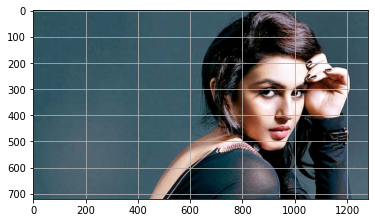

In [94]:
path = '/content/gdrive/MyDrive/Colab Notebooks/data/bollywood_celeb_faces_0/130.jpg'
img = load_image(path)
print("Original Query Image")
plt.imshow(img)
plt.grid(b=None)

In [95]:
faces = alignment.getAllFaceBoundingBoxes(img)
faces

rectangles[[(776, 206) (1097, 527)]]

In [100]:
for i in range(len(faces)):
  print(faces[i])

[(776, 206) (1097, 527)]


In [101]:
face_aligned = alignment.align(96, img, faces[i], landmarkIndices=AlignDlib.OUTER_EYES_AND_NOSE)
face_aligned = (face_aligned / 255.).astype(np.float32)

In [102]:
face_aligned.shape

(96, 96, 3)

In [103]:
np.expand_dims(face_aligned, axis=0).shape

(1, 96, 96, 3)

In [104]:
model.predict(np.expand_dims(face_aligned, axis=0)).shape

(1, 128)

In [105]:
model_relu.predict(model.predict(np.expand_dims(face_aligned, axis=0)))

array([[2.29890813e-13, 2.41346224e-05, 4.70684863e-05, 1.92518371e-07,
        3.62671528e-08, 1.00739366e-04, 1.84155658e-06, 9.99825895e-01]],
      dtype=float32)

In [108]:
for i in range(len(faces)):
  face_aligned = alignment.align(96, img, faces[i], landmarkIndices=AlignDlib.OUTER_EYES_AND_NOSE)
  face_aligned = (face_aligned / 255.).astype(np.float32)
  embedding = model.predict(np.expand_dims(face_aligned, axis=0))
  pred = model_relu.predict(embedding)
  ind = np.argsort(pred[0])
  #print(ind[::-1][:5])
  #print("Prediction: ",le.inverse_transform([ind[::-1][0]])[0])
  #print("Prediction Probability: ",pred[0][ind[::-1][0]]*100,"%")
  #print()

In [109]:
ind

array([0, 4, 3, 6, 1, 2, 5, 7])

In [110]:
ind[::-1][:5]

array([7, 5, 2, 1, 6])

In [115]:
names_encode.inverse_transform(ind[::-1][:5])[0]

'Huma_Qureshi'

In [121]:
print("Prediction Probability: ",pred[0][ind[::-1][0]]*100,"%")

Prediction Probability:  99.98258948326111 %


In [122]:
## with 99 percent probabilty we predicted that above pic is of huma qureshi

In [123]:
## trying different pic 

In [124]:
os.listdir('/content/gdrive/MyDrive/Colab Notebooks/data/bollywood_celeb_faces_0')

['Ameesha_Patel',
 'Alia_Bhatt',
 'Aishwarya_Rai',
 'Amrita_Rao',
 'Amy_Jackson',
 'Disha_Patani',
 'Deepika_Padukone',
 'Huma_Qureshi',
 '118.jpg',
 '130.jpg']

Original Query Image


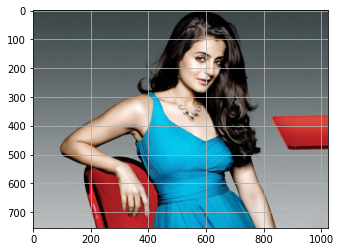

In [125]:
path = '/content/gdrive/MyDrive/Colab Notebooks/data/bollywood_celeb_faces_0/118.jpg'
img = load_image(path)
print("Original Query Image")
plt.imshow(img)
plt.grid(b=None)

In [126]:

faces = alignment.getAllFaceBoundingBoxes(img)

for i in range(len(faces)):
  face_aligned = alignment.align(96, img, faces[i], landmarkIndices=AlignDlib.OUTER_EYES_AND_NOSE)
  face_aligned = (face_aligned / 255.).astype(np.float32)
  pred =model_relu.predict(model.predict(np.expand_dims(face_aligned, axis=0)))
  ind = np.argsort(pred[0])
  print(ind[::-1][:5])
  predicted_name=names_encode.inverse_transform(ind[::-1][:5])[0]
  print("Prediction: ",predicted_name)
  print("Prediction Probability: ",pred[0][ind[::-1][0]]*100,"%")
  print()

[2 5 6 1 4]
Prediction:  Ameesha_Patel
Prediction Probability:  99.99978542327881 %

